# Student Performance Analysis

## Machine Learning Project Life Cycle
1. **Understanding the Problem**
2. **Data Collection**
3. **Data Validation and Quality Checks**
4. **Exploratory Data Analysis (EDA)**
5. **Data Preprocessing**
6. **Model Training**
7. **Selecting the Best Model**

---

## 1. Problem Statement
This project aims to analyze how various factors influence student performance in exams. Specifically, the goal is to understand the impact of variables like gender, ethnicity, parental education level, lunch type, and test preparation course on test scores.

## 2. Data Collection
- **Dataset Source:** [Kaggle: Student Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- **Dataset Overview:** The dataset contains 1000 rows and 8 columns.

### 2.1 Importing Data and Libraries
To begin, we’ll import essential libraries such as Pandas, Numpy, Matplotlib, Seaborn, and Warnings to handle data manipulation, visualization, and suppress warnings.


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/Users/shubhmehta/Desktop/programming/ML-Project/notebook/StudentsPerformance.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

In [12]:
#Check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
#Check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# Checking no. of unique values in each coloumn 
for column in df.columns:
    unique_values=df[column].unique()
    print(f"Unique values in '{column}': ({len(unique_values)})")
    print(unique_values)
    print("\n")

Unique values in 'gender': (2)
['female' 'male']


Unique values in 'race/ethnicity': (5)
['group B' 'group C' 'group A' 'group D' 'group E']


Unique values in 'parental level of education': (6)
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Unique values in 'lunch': (2)
['standard' 'free/reduced']


Unique values in 'test preparation course': (2)
['none' 'completed']


Unique values in 'math score': (81)
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


Unique values in 'reading score': (72)
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
From the numerical data provided, the mean values are quite close, ranging from 66 to 68.05. Similarly, the standard deviations are within a narrow range, between 14.6 and 15.19. Notably, the minimum score for math is 0, while the minimum score for writing is higher at 10, and for reading, it is even higher at 17.



In [16]:
#define numeric and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print column
print('The dataset has {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('The Dataset has {} categorical features: {}'.format(len(categorical_features), categorical_features))

The dataset has 3 numerical features: ['math score', 'reading score', 'writing score']
The Dataset has 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
#Add columns for total score and Avg
df['total score']= df['math score'] +df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100].shape[0]
writing_full = df[df['writing score'] == 100].shape[0]
math_full = df[df['math score'] == 100].shape[0]

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_25 = df[df['reading score'] <= 25].shape[0]
writing_less_25 = df[df['writing score'] <= 25].shape[0]
math_less_25 = df[df['math score'] <= 25].shape[0]

print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_25}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_25}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_25}')

Number of students with less than or equal to 20 marks in Maths: 7
Number of students with less than or equal to 20 marks in Writing: 5
Number of students with less than or equal to 20 marks in Reading: 4


### Insights
Based on the above values, students have shown the lowest performance in Mathematics, while the highest scores are observed in the Reading section.

## Exploring Data (Visualization)

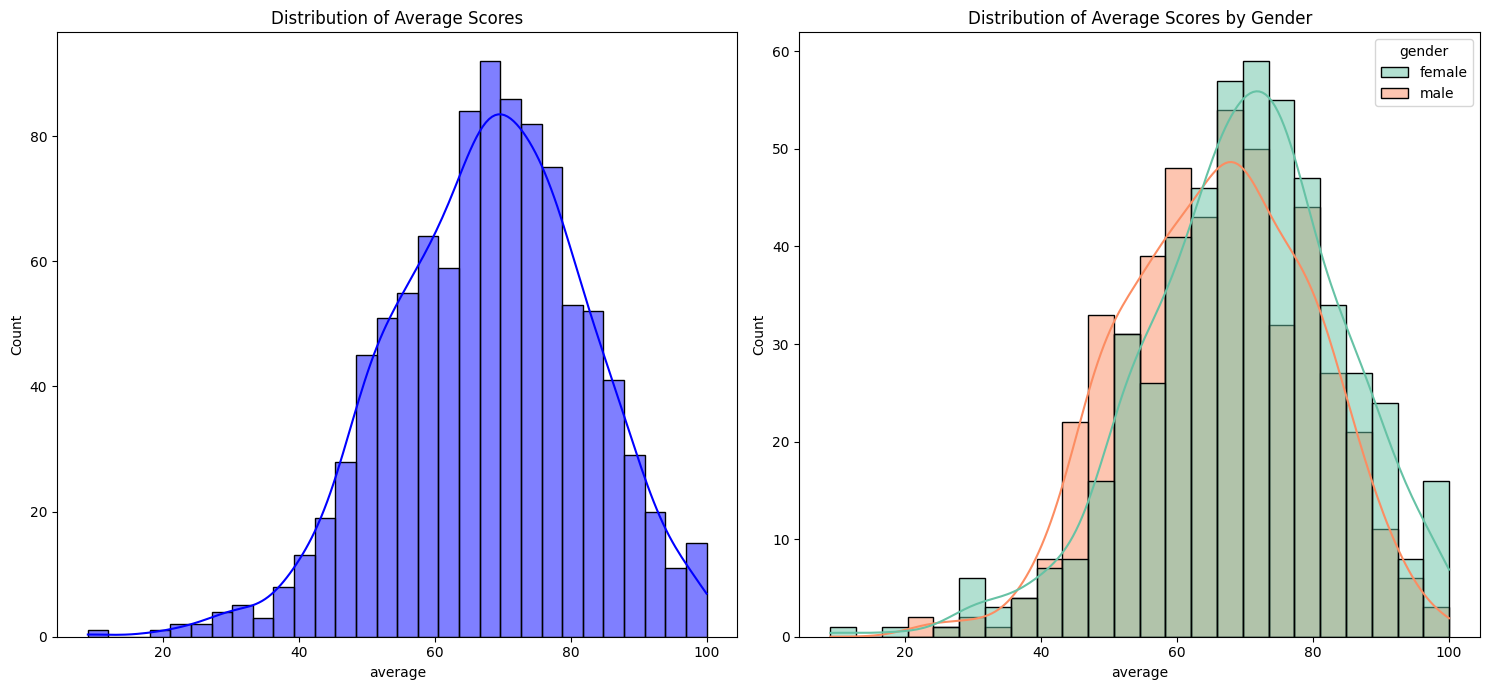

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of 'average' with 30 bins and KDE
sns.histplot(data=df, x='average', bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Plot 2: Histogram of 'average' with KDE and hue based on 'gender
sns.histplot(data=df, x='average', kde=True, hue='gender', palette='Set2', ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Gender')

# Display the plots
plt.tight_layout() 
plt.show()

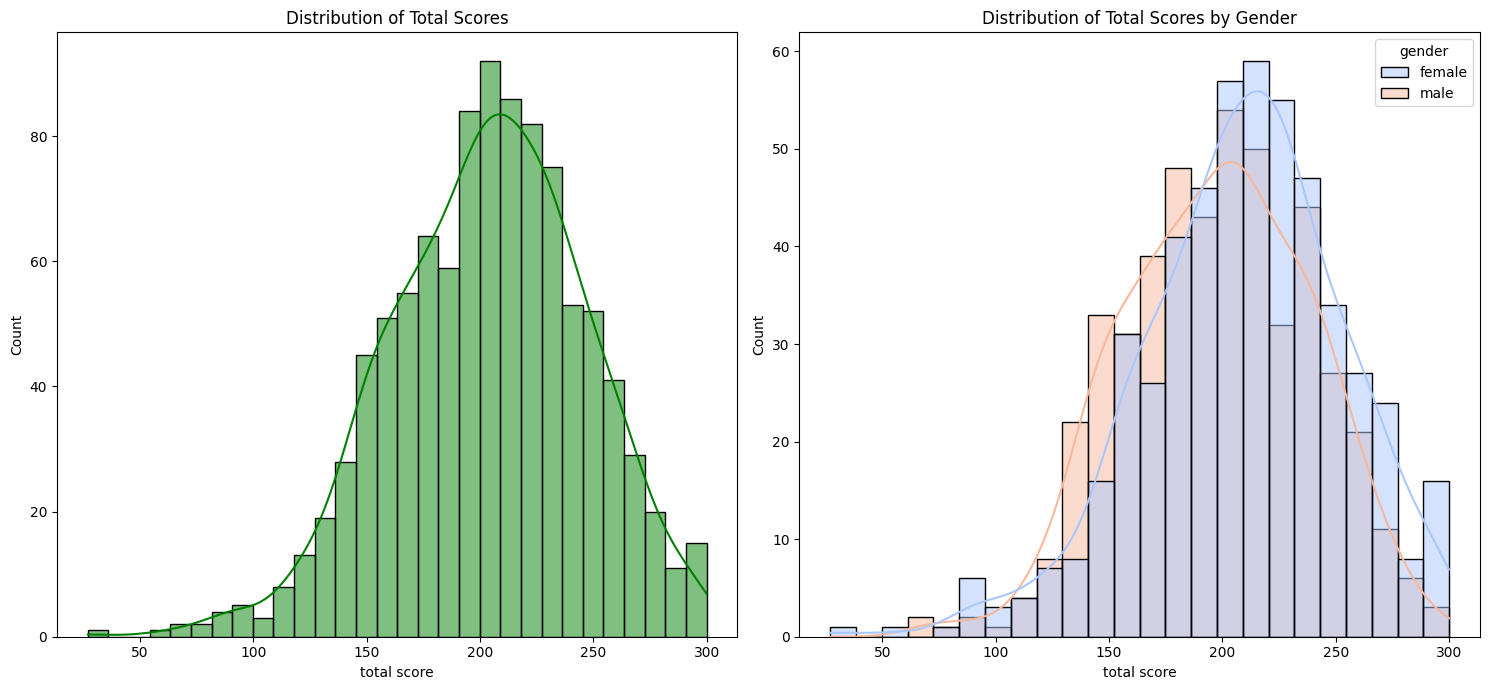

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram of 'total score' with 30 bins and KDE
sns.histplot(data=df, x='total score', bins=30, kde=True, color='green', ax=axs[0])
axs[0].set_title('Distribution of Total Scores')

# Plot 2: Histogram of 'total score' with KDE and hue based on 'gender'
sns.histplot(data=df, x='total score', kde=True, hue='gender', palette='coolwarm', ax=axs[1])
axs[1].set_title('Distribution of Total Scores by Gender')

# Display the plots
plt.tight_layout() 
plt.show()

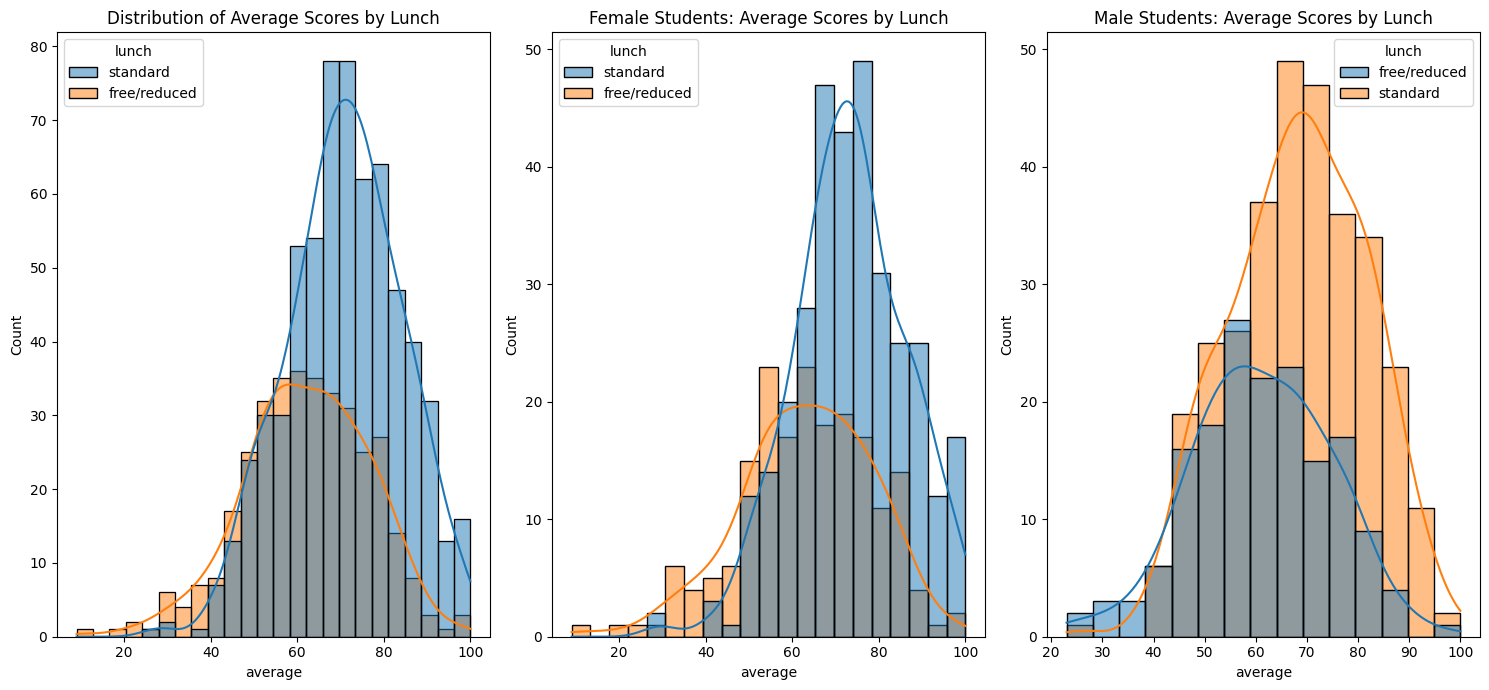

In [22]:
plt.subplots(1, 3, figsize=(15, 7))

# Plot 1: Histogram of 'average' with KDE 
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch')

# Plot 2: Histogram of 'average' for female students with KDE
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Female Students: Average Scores by Lunch')

# Plot 3: Histogram of 'average' for male students with KDE
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Male Students: Average Scores by Lunch')

# Display the plots
plt.tight_layout()  
plt.show()

### Insights
Students who receive a standard lunch tend to perform better in exams. This positive effect is consistent for both male and female students.


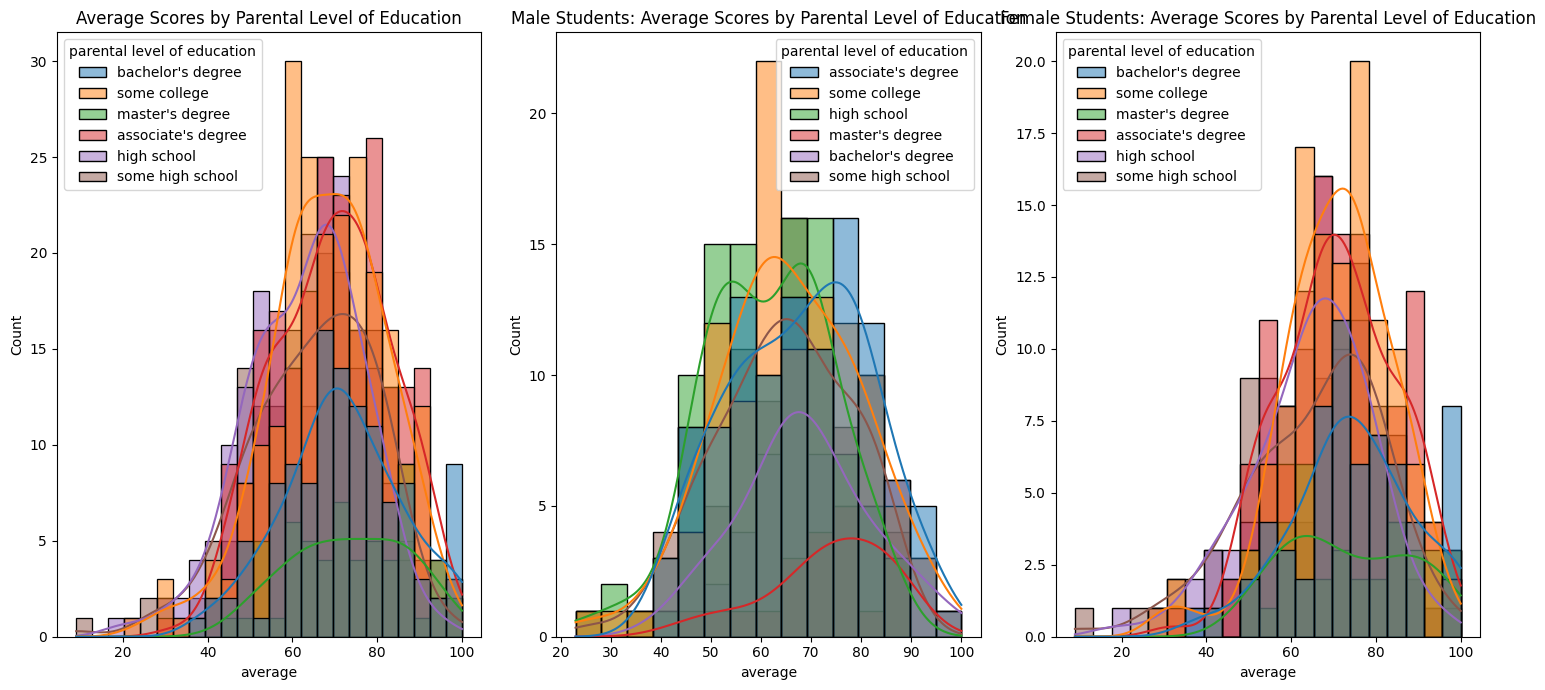

In [23]:
plt.subplots(1, 3, figsize=(15, 7))

# Plot 1: Histogram of 'average' with KDE and hue based on 'parental level of education'
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title('Average Scores by Parental Level of Education')

# Plot 2: Histogram of 'average' for male students with KDE and hue based on 'parental level of education'
plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
plt.title('Male Students: Average Scores by Parental Level of Education')

# Plot 3: Histogram of 'average' for female students with KDE and hue based on 'parental level of education'
plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.title('Female Students: Average Scores by Parental Level of Education')

# Display the plots
plt.tight_layout()
plt.show()

### Insights
Overall, parental education does not seem to significantly impact students' exam performance.

- In the second plot, male students whose parents hold an associate's or master's degree tend to perform better in exams.
- The third plot shows that parental education has little to no noticeable effect on the performance of female students.

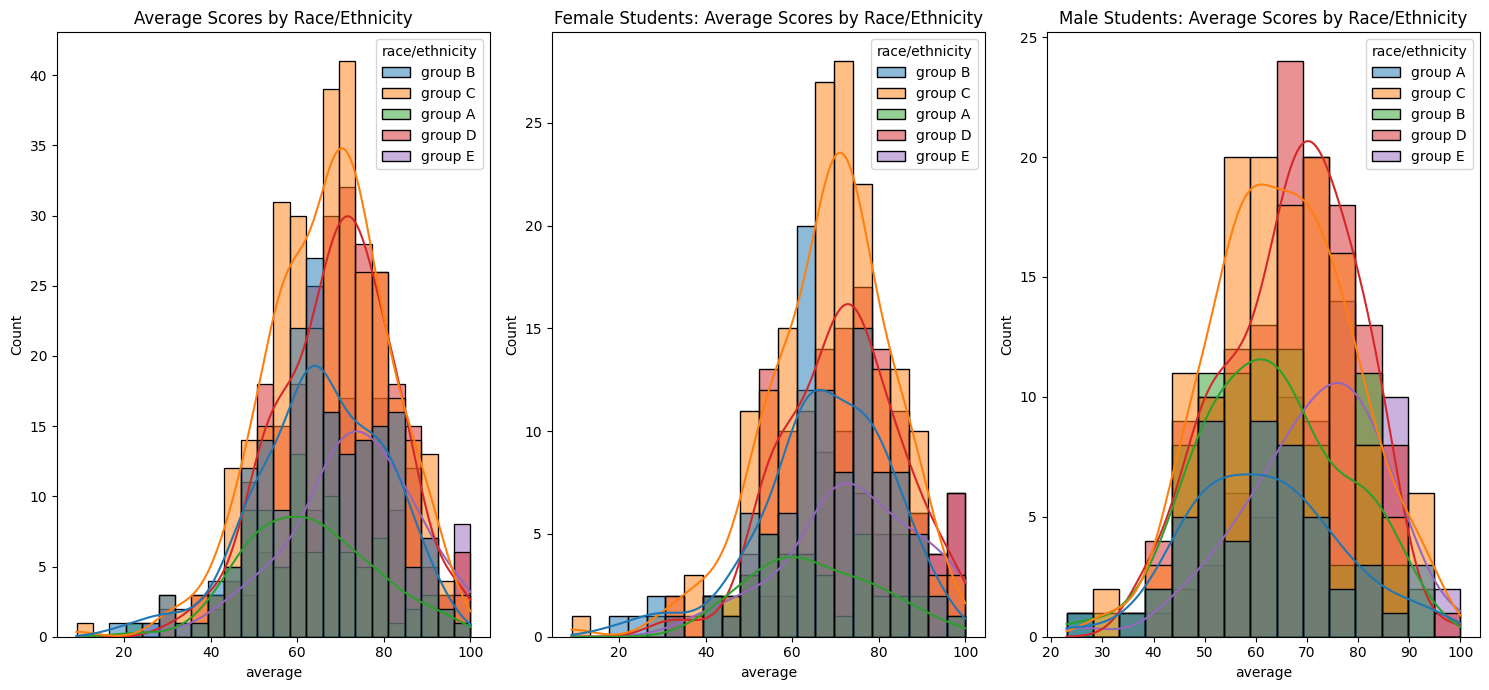

In [24]:
plt.subplots(1, 3, figsize=(15, 7))

# Plot 1: Histogram of 'average' with KDE and hue based on 'race/ethnicity'
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.title('Average Scores by Race/Ethnicity')

# Plot 2: Histogram of 'average' for female students with KDE and hue based on 'race/ethnicity'
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.title('Female Students: Average Scores by Race/Ethnicity')

# Plot 3: Histogram of 'average' for male students with KDE and hue based on 'race/ethnicity'
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.title('Male Students: Average Scores by Race/Ethnicity')

# Display the plots
plt.tight_layout()
plt.show()

### Insights
Students belonging to group A and group B tend to perform poorly in exams.

This trend remains consistent across both male and female students, indicating that gender does not affect the performance gap for these groups.

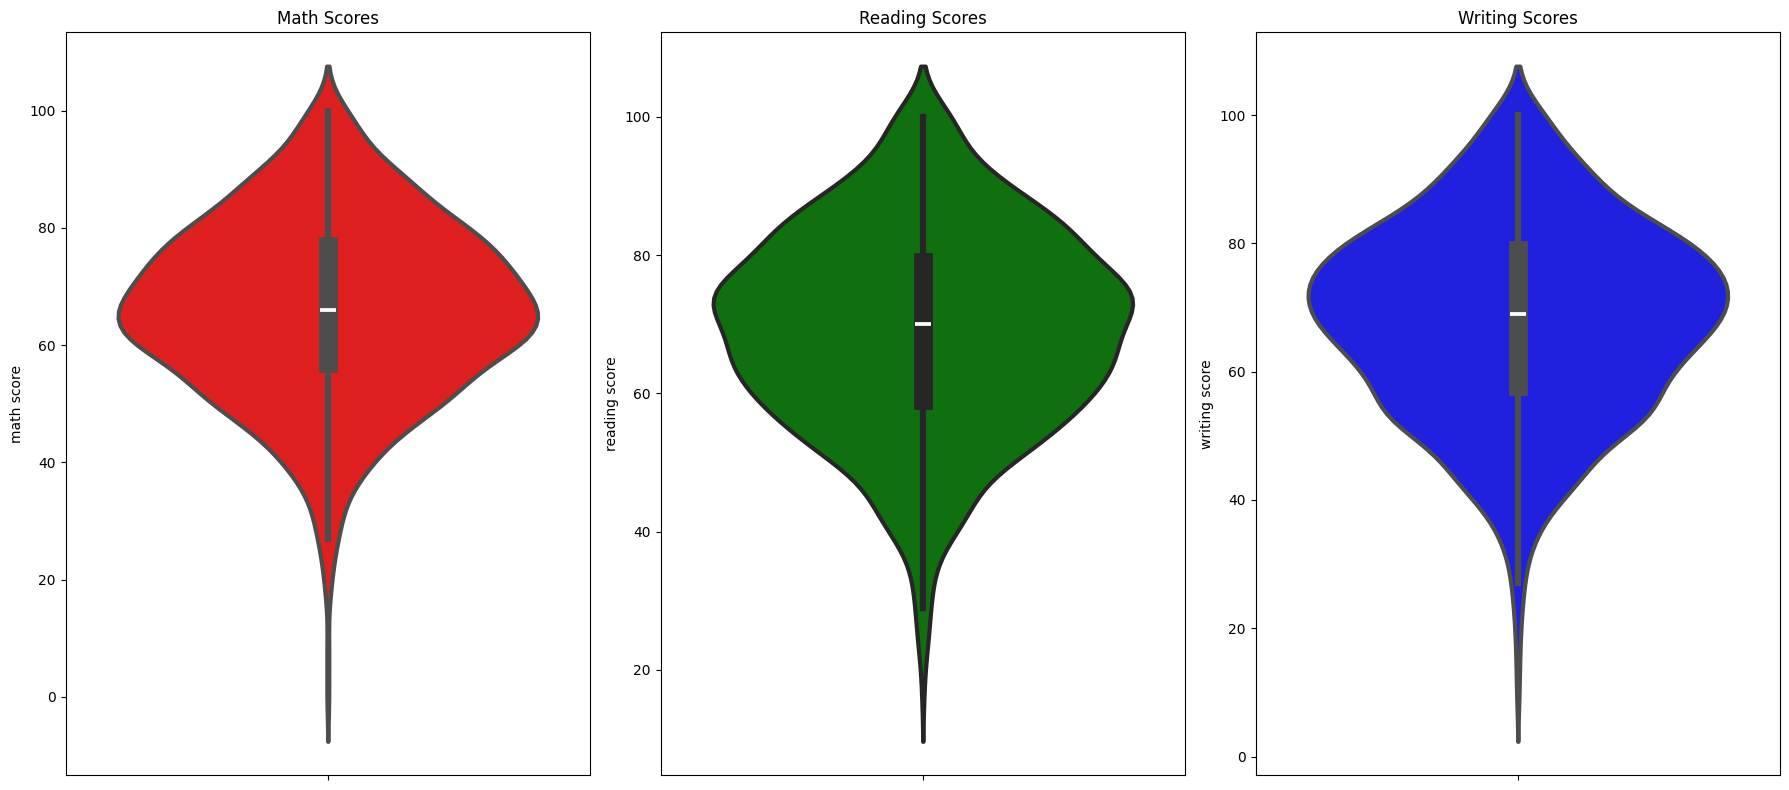

In [25]:
#Maximumum score of students in all three subjects

plt.figure(figsize=(18, 8))

# Plot 1: Violin plot for Math Scores
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

# Plot 2: Violin plot for Reading Scores
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

# Plot 3: Violin plot for Writing Scores
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

# Display the plots
plt.tight_layout()
plt.show()

### Insights
From the three plots, it is evident that most students score between 60 and 80 in Math. In contrast, the majority of students score between 50 and 80 in both Reading and Writing.

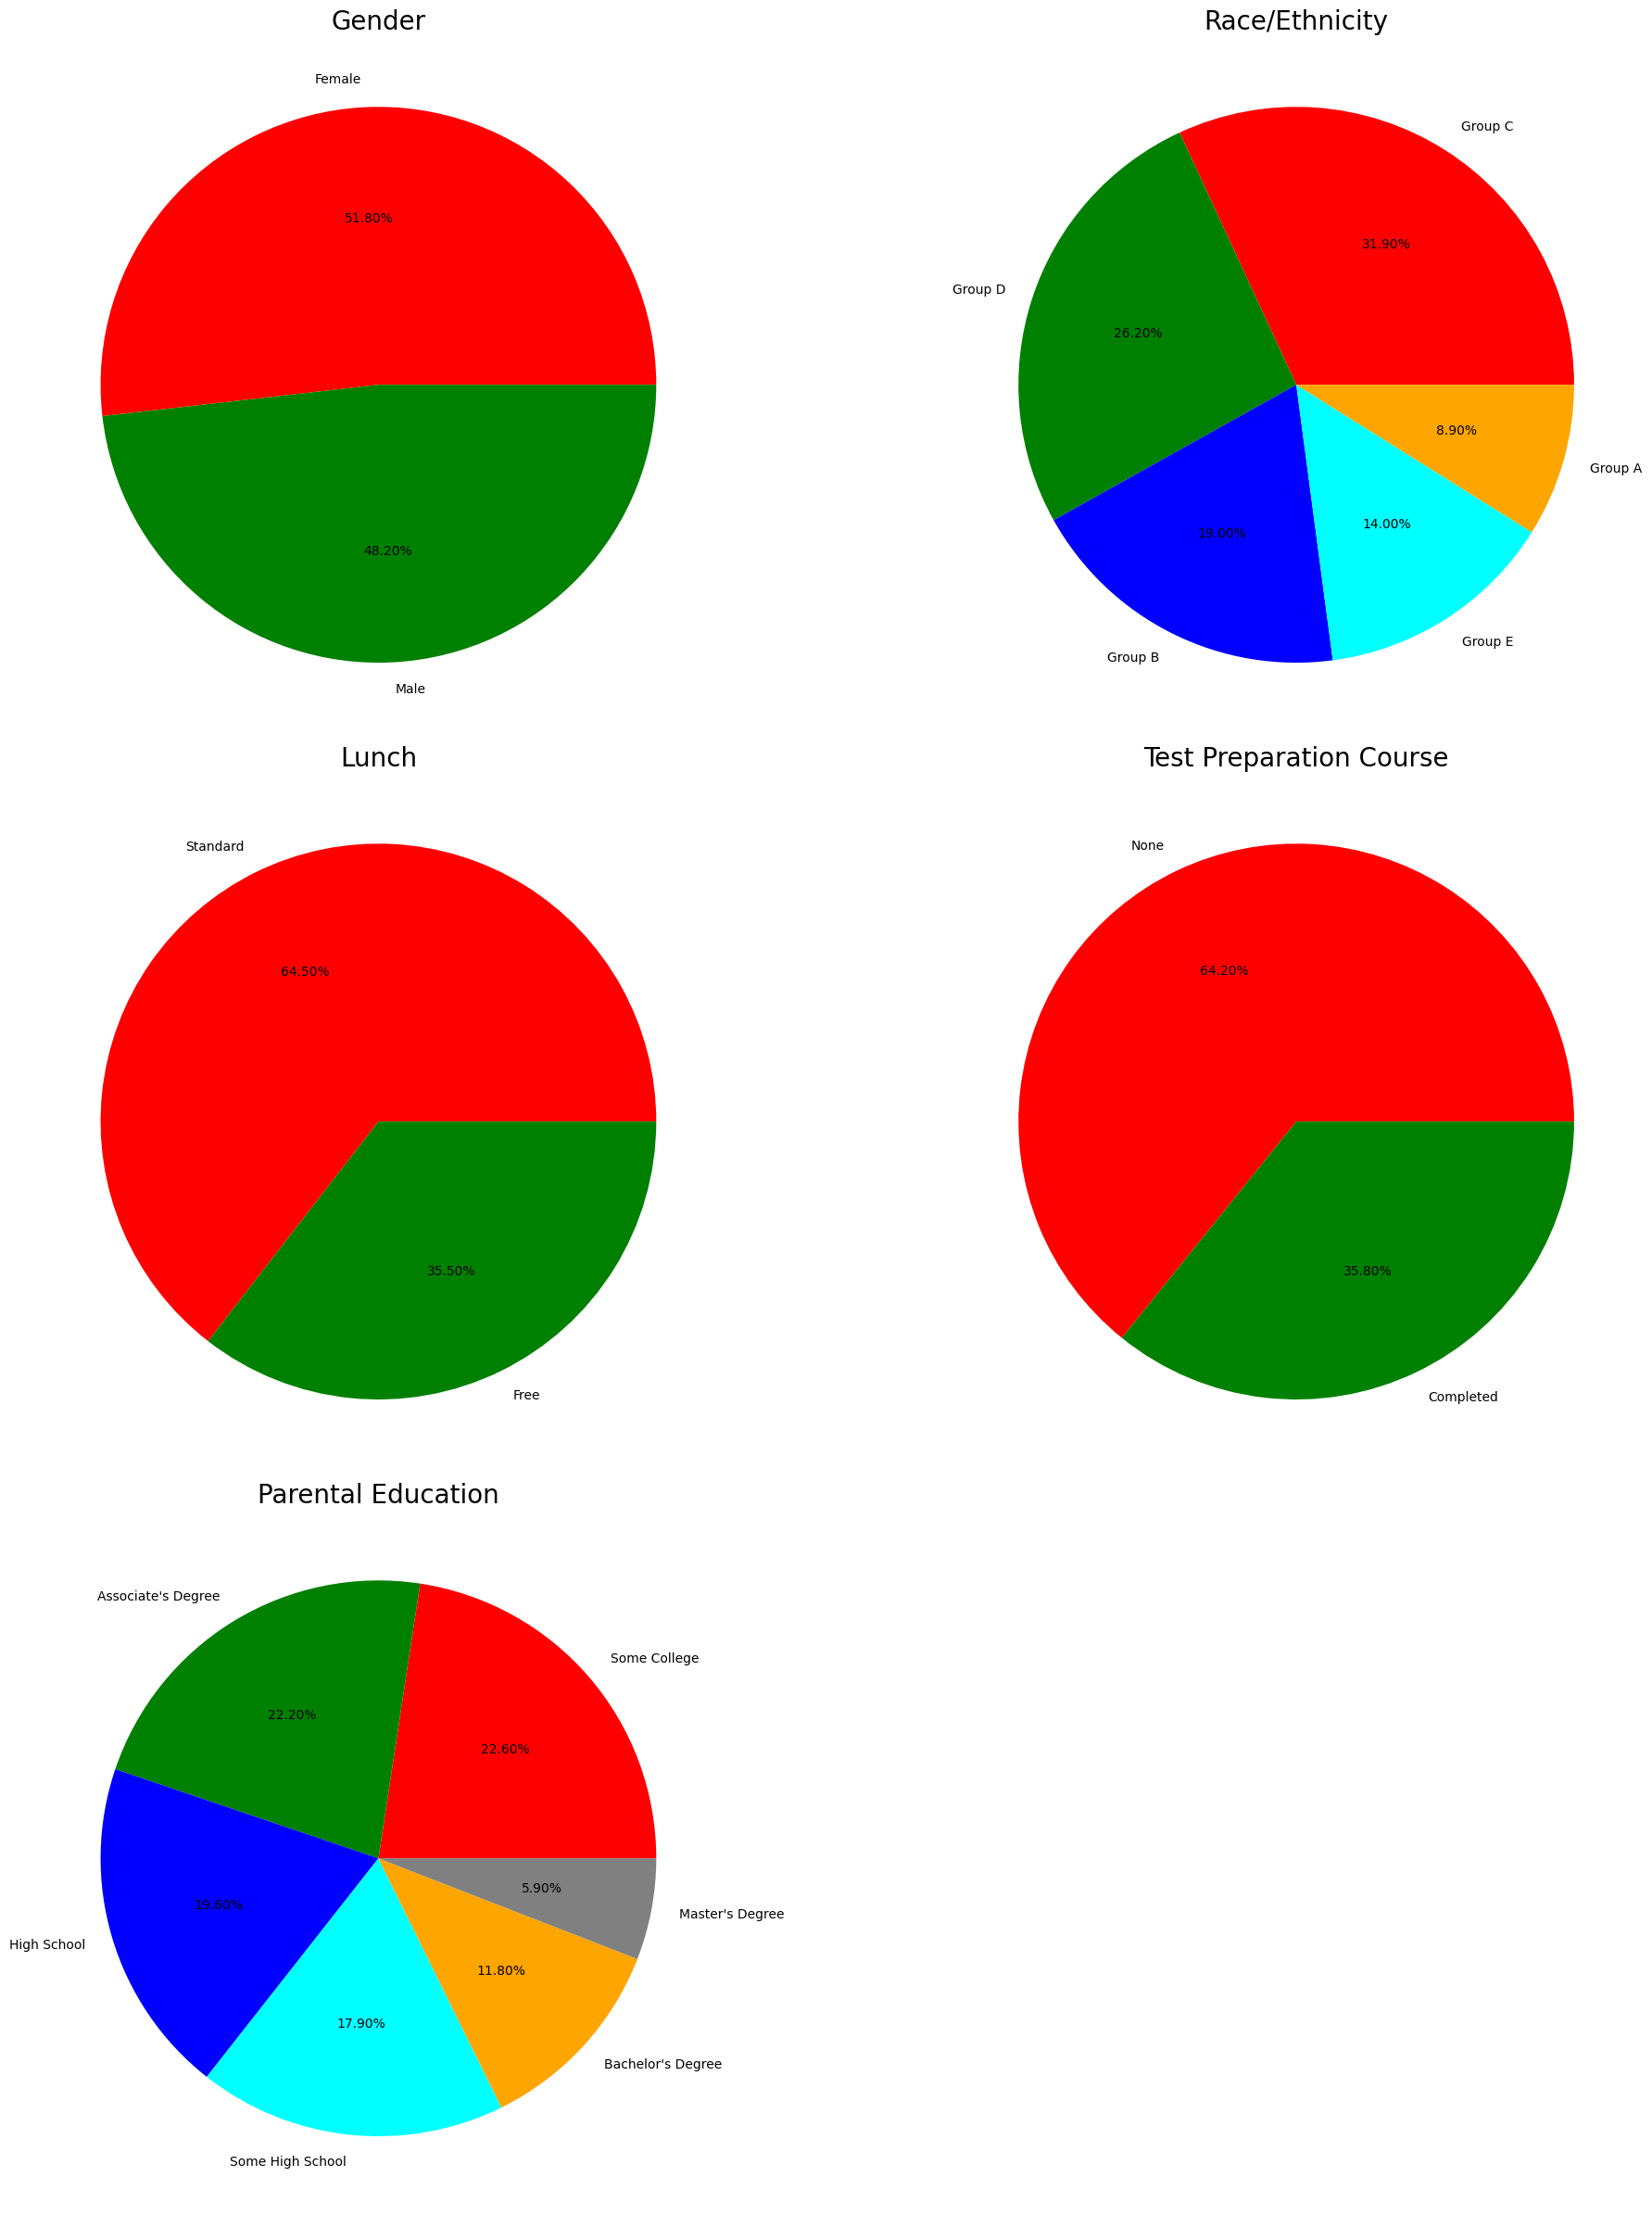

In [26]:
#Multivariate analysis using pieplot

# Set the figure size for all subplots (larger for bigger pie charts)
plt.figure(figsize=(20, 24))

# Plot 1: Gender distribution
plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Plot 2: Race/Ethnicity distribution
plt.subplot(3, 2, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Plot 3: Lunch distribution
plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Plot 4: Test preparation course distribution
plt.subplot(3, 2, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

# Plot 5: Parental level of education distribution
plt.subplot(3, 2, 5)
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Insights
- The number of male and female students is almost equal.
- The majority of students belong to Group C.
- More students have opted for the standard lunch compared to free/reduced lunch.
- A higher number of students have not enrolled in any test preparation course.
- The most common parental education level is "Some College," followed closely by "Associate's Degree."

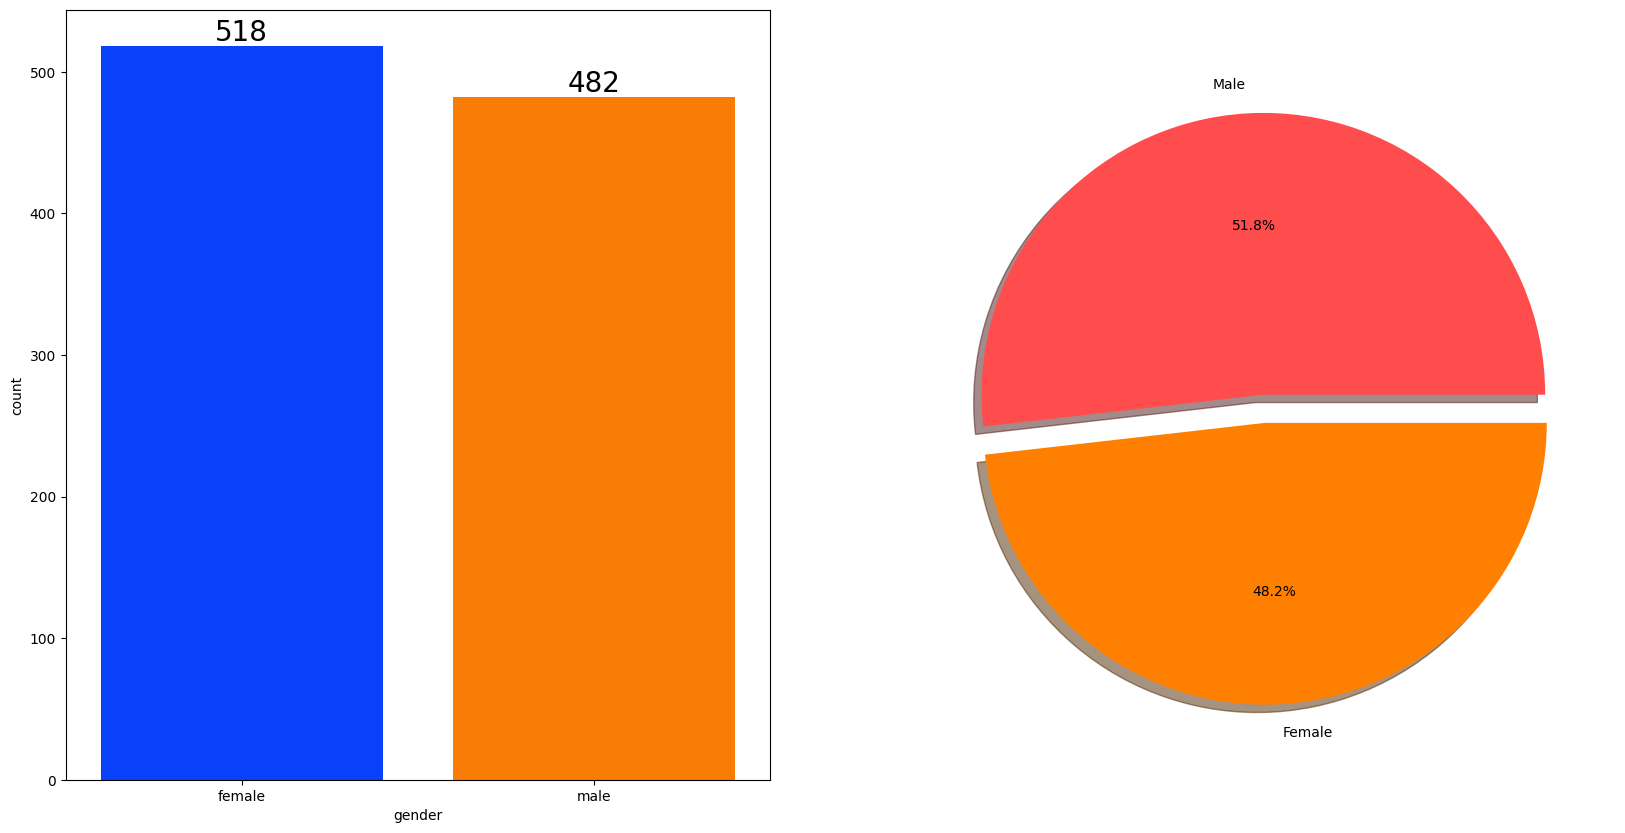

In [27]:
#UNIVARIATE ANALYSIS

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Countplot for Gender
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot 2: Pie chart for Gender distribution
plt.subplot(1, 2, 2)
plt.pie(x=df['gender'].value_counts(), 
        labels=['Male', 'Female'], 
        explode=[0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=['#ff4d4d', '#ff8000'])

# Show the plots
plt.show()

### Insights
The gender distribution is balanced, with 518 female students (48%) and 482 male students (52%).

In [28]:
# Select only numeric columns before calculating the mean
numeric_cols = df.select_dtypes(include=['number'])

# Group by 'gender' and calculate the mean of the numeric columns
gender_group = df.groupby('gender')[numeric_cols.columns].mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


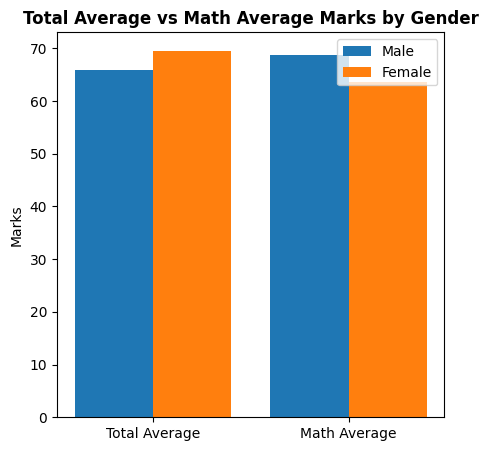

In [29]:
plt.figure(figsize=(5, 5))

# Define the labels and data for the bar plot
X = ['Total Average', 'Math Average']

# Access average scores for female and male from gender_group using .loc[] to ensure correct referencing
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math score']]

# Define positions for the bars
X_axis = np.arange(len(X))

# Plot the bars for male and female scores
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Customize the plot
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend()

# Display the plot
plt.show()

### Insights
- On average, female students have a higher overall score compared to male students.
- However, male students tend to outperform females in Math.

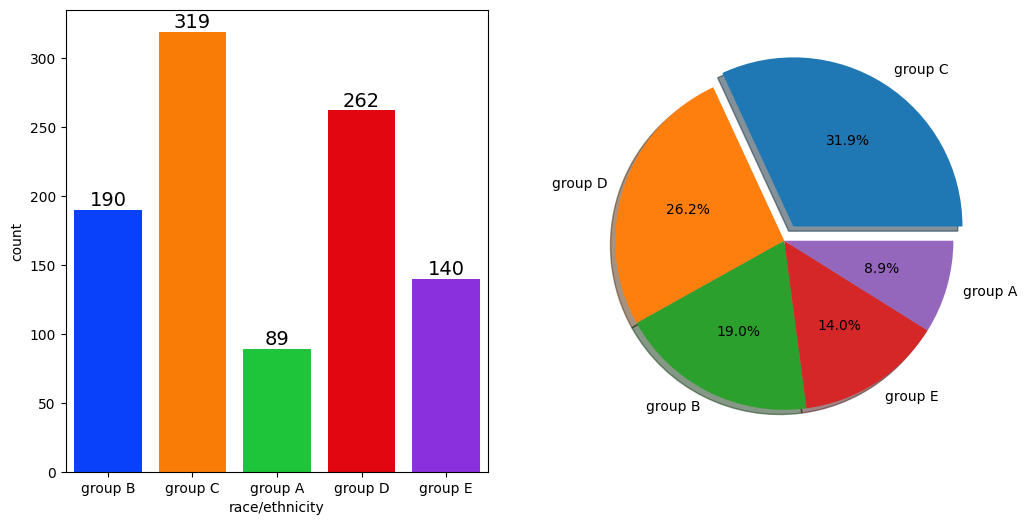

In [30]:
# Plot 1: Countplot for Race/Ethnicity
f, ax = plt.subplots(1, 2, figsize=(12, 6))  # Reduced the figure size

# Plot 1: Countplot for Race/Ethnicity
sns.countplot(x='race/ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add data labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Reduced label font size

# Plot 2: Pie chart for Race/Ethnicity distribution
plt.subplot(1, 2, 2)
plt.pie(x=df['race/ethnicity'].value_counts(),
        labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0],  # Explode the first slice slightly
        autopct='%1.1f%%',
        shadow=True)

# Display the plots
plt.show()

### Insights
- The majority of students belong to Group C and Group D.
- Group A has the lowest number of students.

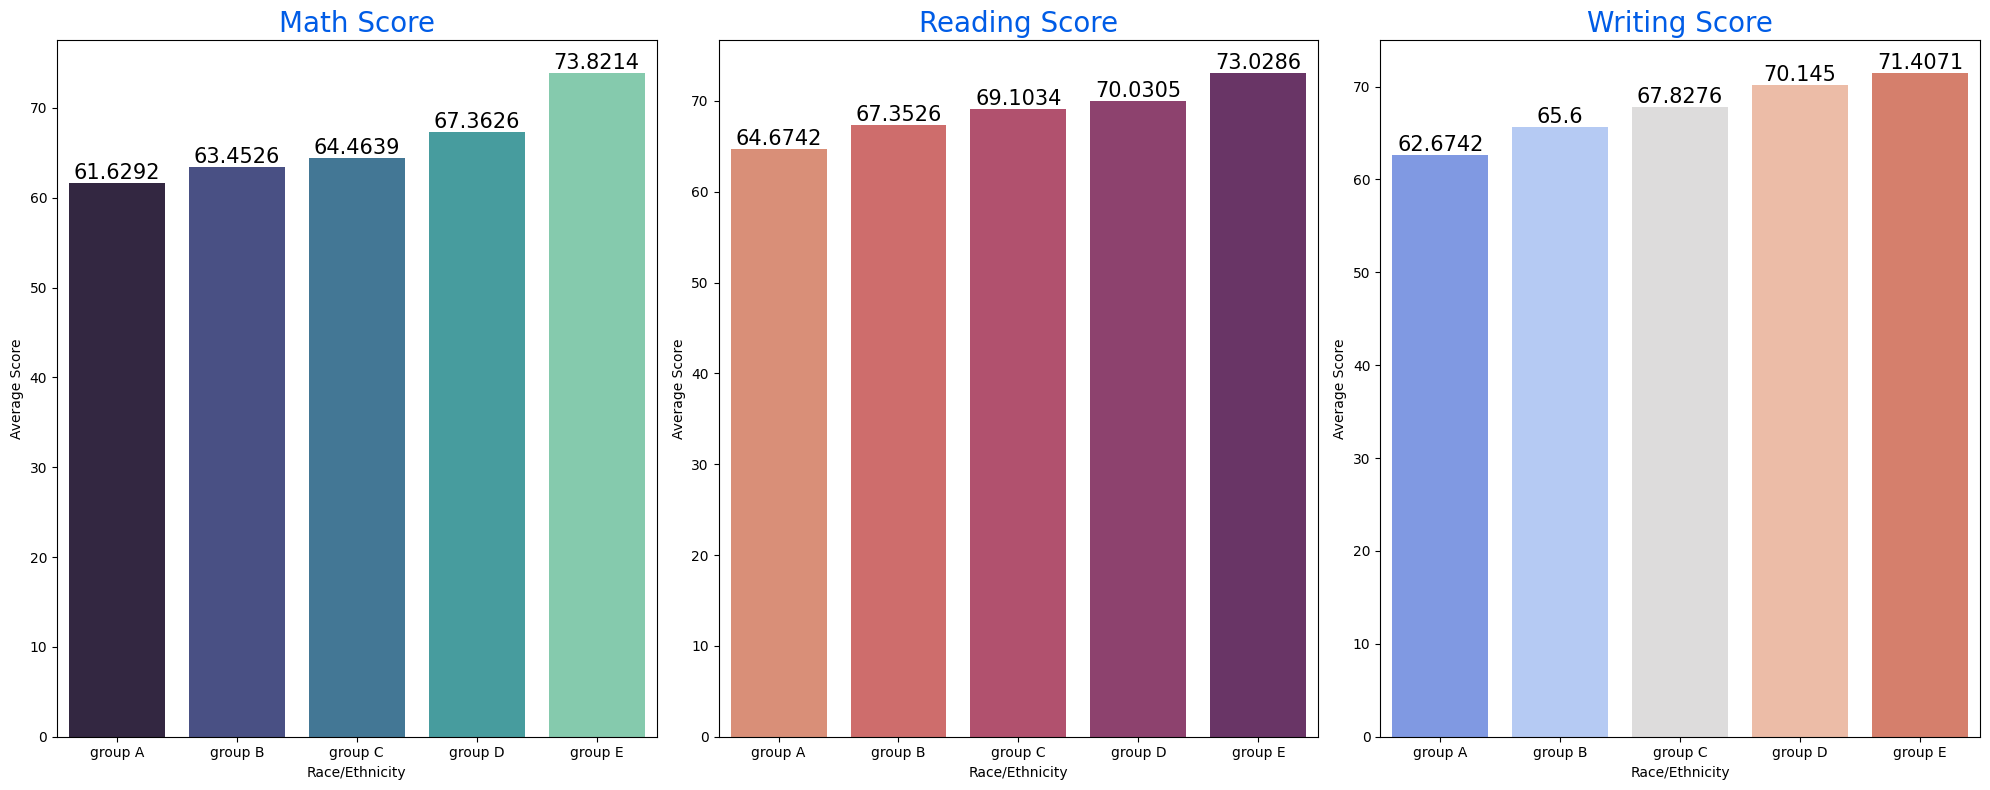

In [31]:
#BIVARIATE ANALYSIS

# Grouping the data by 'race/ethnicity'
Group_data2 = df.groupby('race/ethnicity')

# Create a figure with 1 row and 3 columns for the subplots, set figure size
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1: Math score barplot
sns.barplot(x=Group_data2['math score'].mean().index, 
            y=Group_data2['math score'].mean().values, 
            palette='mako', ax=ax[0])

# Set title and format for the Math score plot
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel('Race/Ethnicity')
ax[0].set_ylabel('Average Score')

# Add data labels for Math score
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot 2: Reading score barplot
sns.barplot(x=Group_data2['reading score'].mean().index, 
            y=Group_data2['reading score'].mean().values, 
            palette='flare', ax=ax[1])

# Set title and format for the Reading score plot
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xlabel('Race/Ethnicity')
ax[1].set_ylabel('Average Score')

# Add data labels for Reading score
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot 3: Writing score barplot
sns.barplot(x=Group_data2['writing score'].mean().index, 
            y=Group_data2['writing score'].mean().values, 
            palette='coolwarm', ax=ax[2])

# Set title and format for the Writing score plot
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xlabel('Race/Ethnicity')
ax[2].set_ylabel('Average Score')

# Add data labels for Writing score
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Insights
- Students from Group E have achieved the highest average scores across all subjects.
- Students from Group A have the lowest average scores.
- Students from lower socioeconomic groups tend to have lower averages in all course subjects.

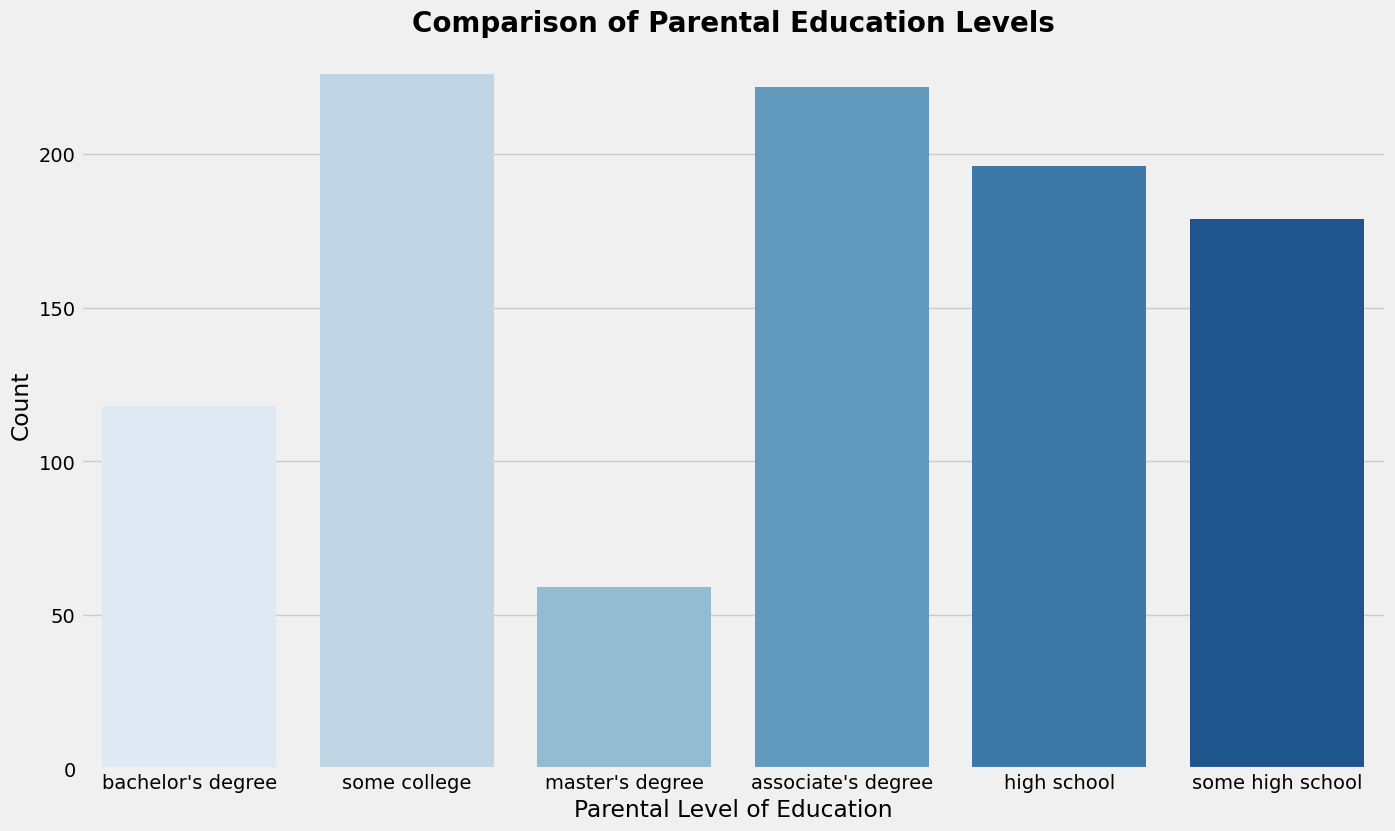

In [32]:
# Set figure size
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Plot a countplot for the 'parental level of education' column with a blue palette
sns.countplot(x='parental level of education', data=df, palette='Blues')

# Set the title and customize the font
plt.title('Comparison of Parental Education Levels', fontweight='bold', fontsize=20)

# Set x and y axis labels
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')

# Display the plot
plt.show()

### Insights
The largest proportion of parents have completed some college education.

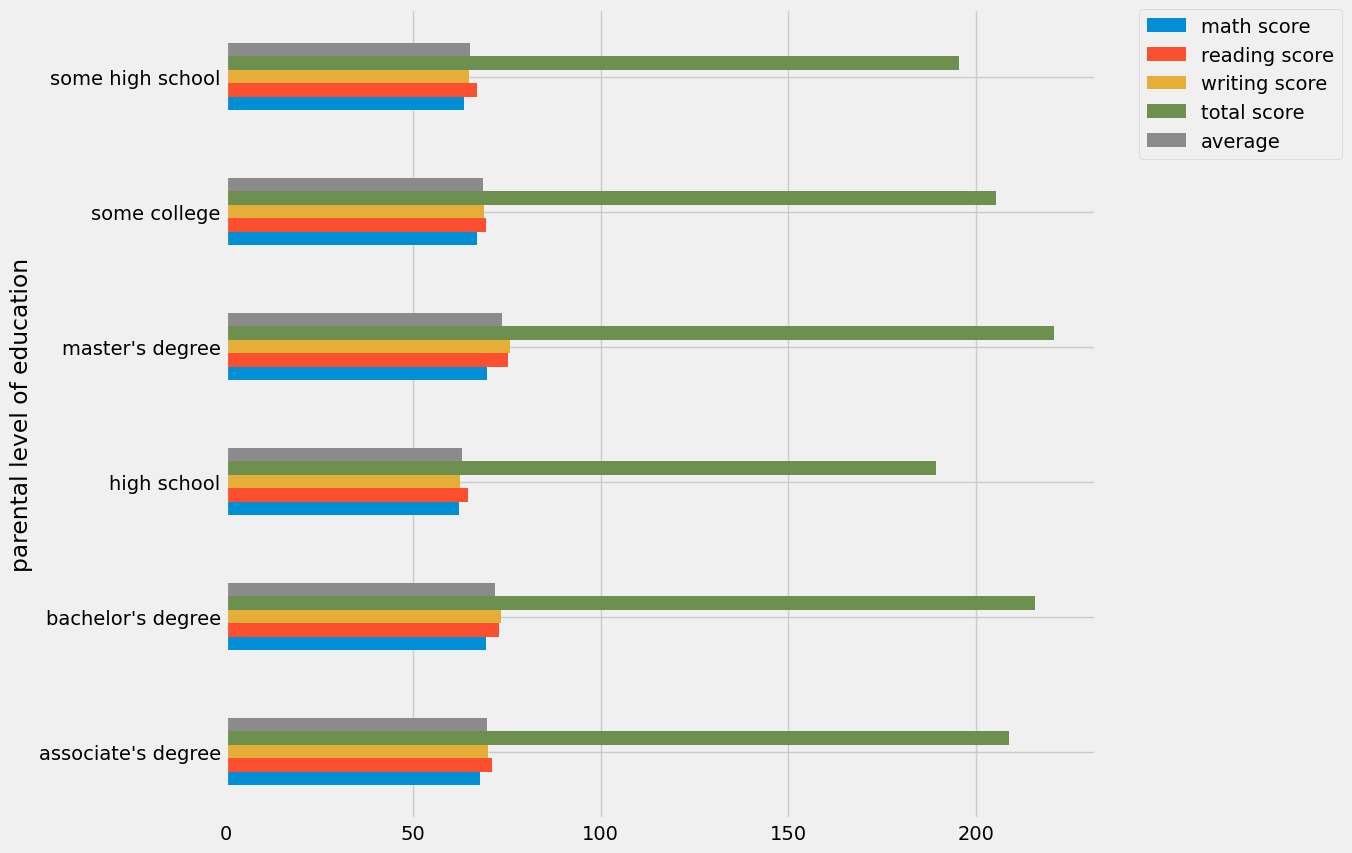

In [33]:
# Select only numeric columns before calculating the mean
numeric_columns = df.select_dtypes(include='number')

# Group the data by 'parental level of education', calculate the mean of numeric columns, and create a horizontal bar plot
numeric_columns.groupby(df['parental level of education']).mean().plot(kind='barh', figsize=(10, 10))

# Adjust the legend to appear outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()

### Insights
Students whose parents hold a master's or bachelor's degree tend to have higher scores compared to others.

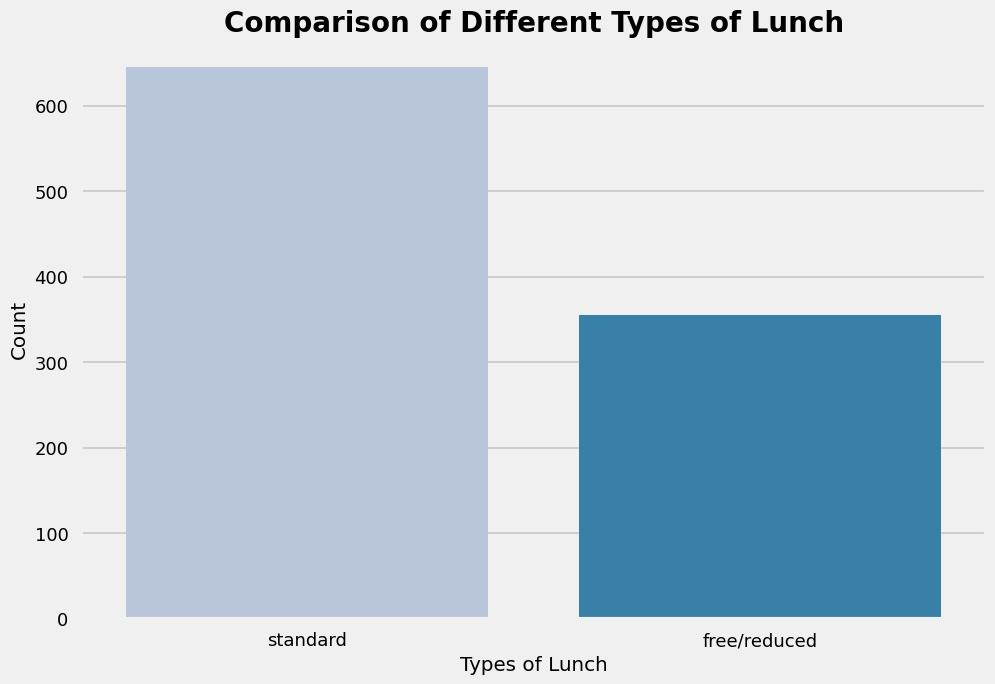

In [34]:
# Set a smaller figure size and style
plt.rcParams['figure.figsize'] = (10, 6)  # Reduced the figure size
plt.style.use('seaborn-v0_8-talk')  # Use the correct versioned style

# Create a countplot for 'lunch' with the specified palette
sns.countplot(x='lunch', data=df, palette='PuBu')

# Set title and axis labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Display the plot
plt.show()

### Insights
A greater number of students are served standard lunch compared to free lunch.

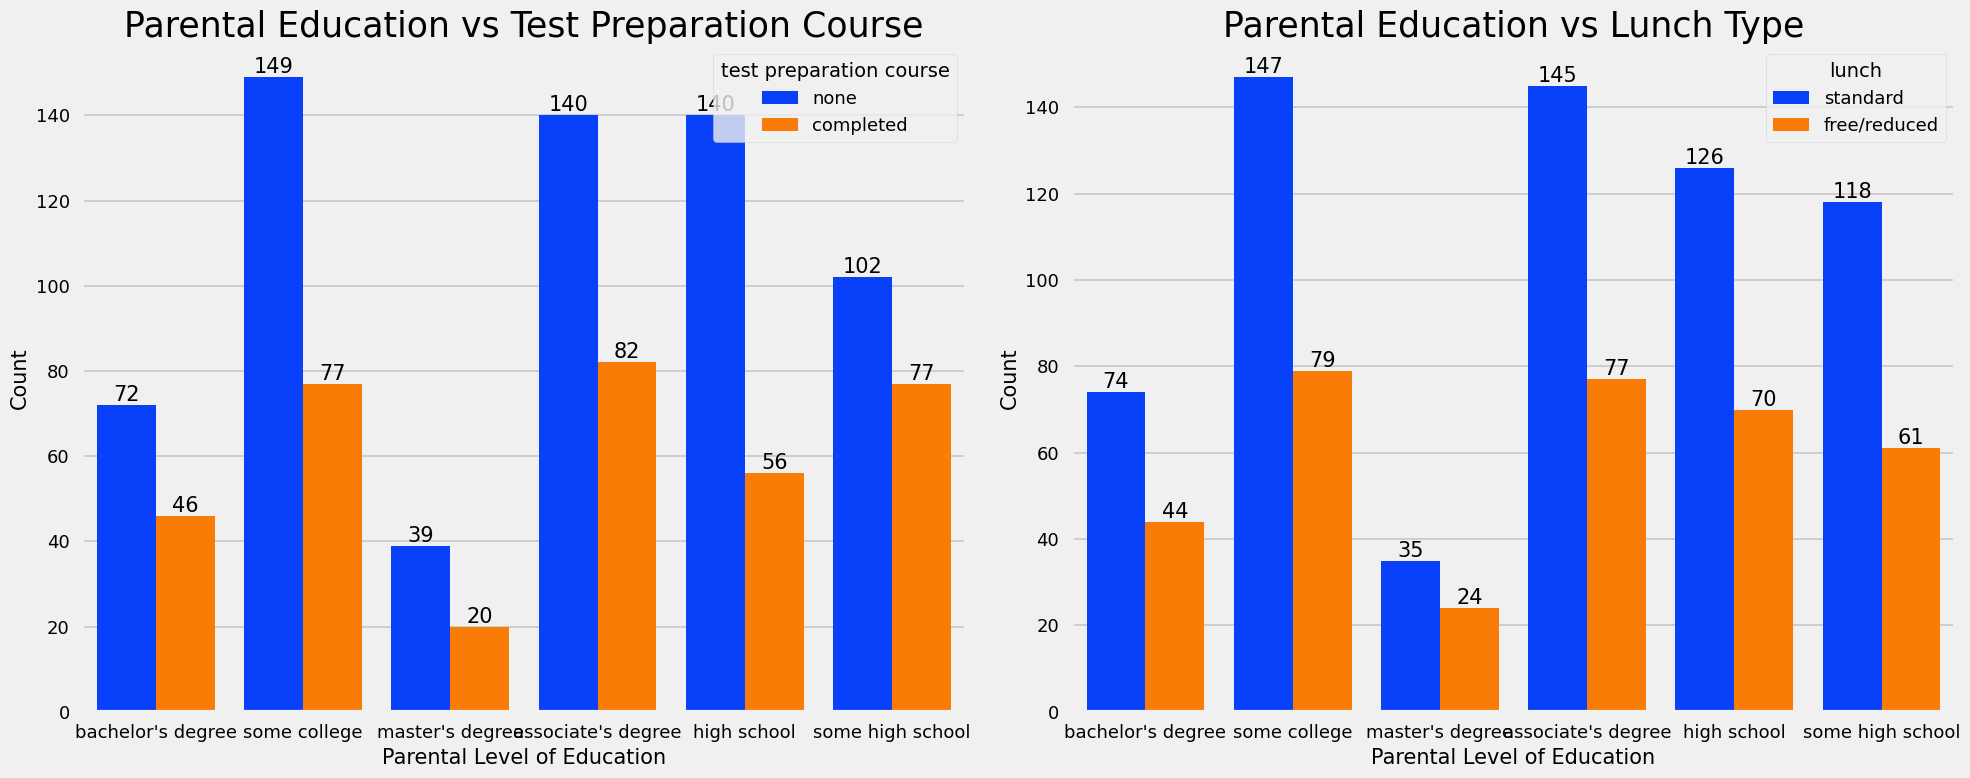

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Countplot for Parental Education vs Test Preparation Course
sns.countplot(x='parental level of education', data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Parental Education vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)

# Add data labels to the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot 2: Countplot for Parental Education vs Lunch
sns.countplot(x='parental level of education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Parental Education vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)

# Add data labels to the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Insights
Students who receive standard lunch tend to perform better compared to those who receive free or reduced lunch.

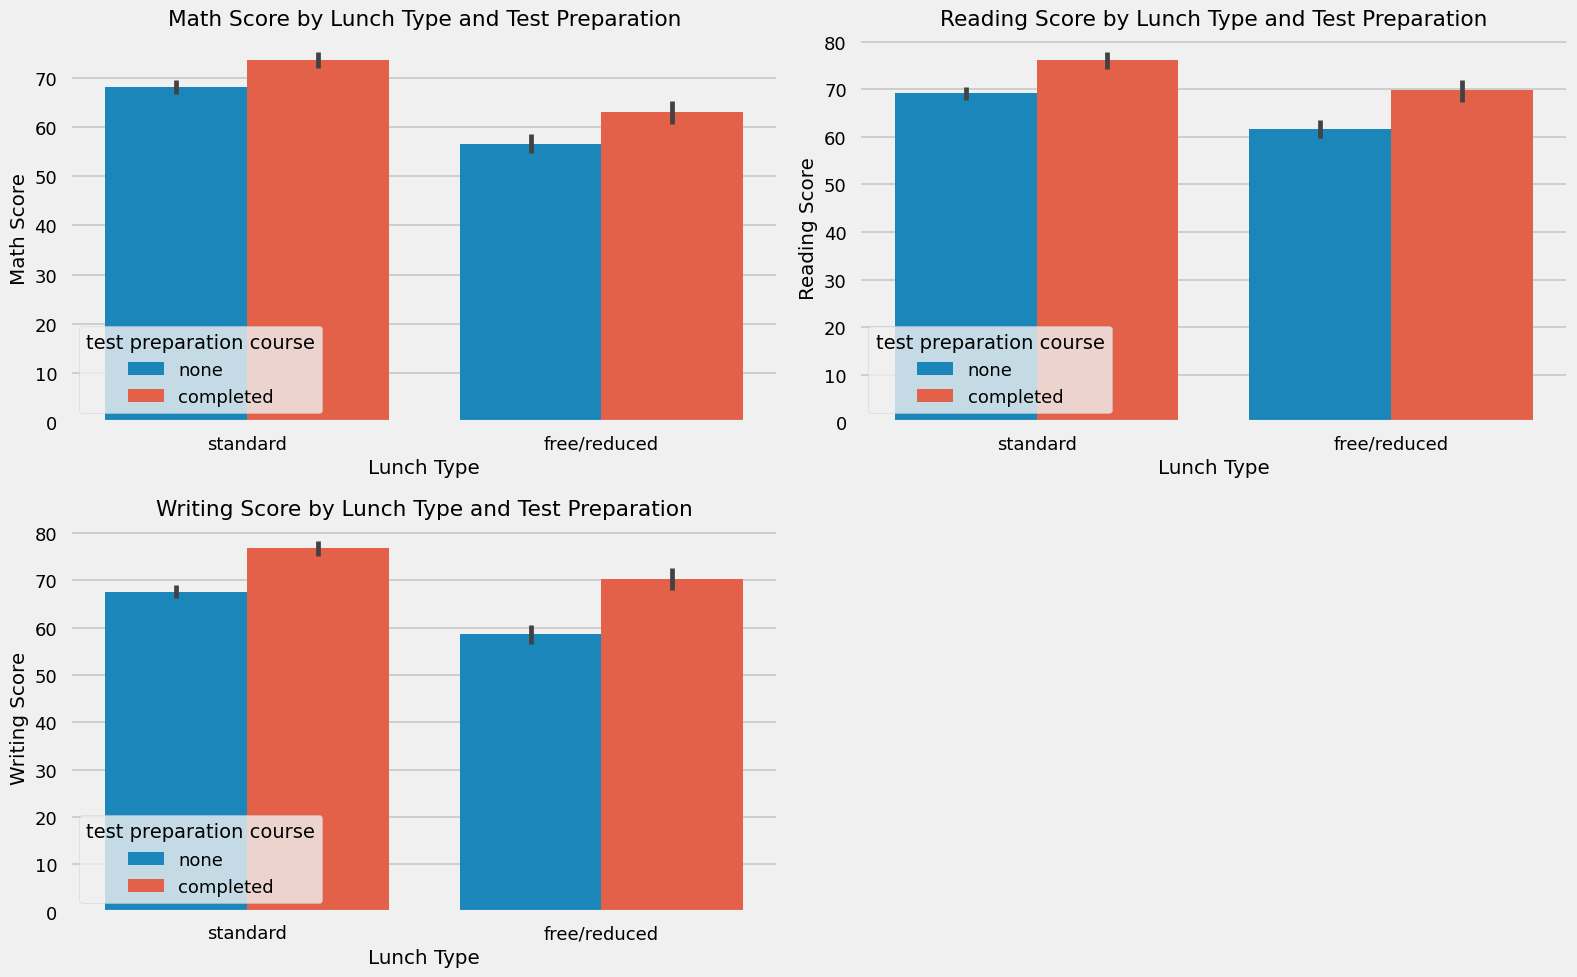

In [36]:
# Set the figure size for the subplots
plt.figure(figsize=(16, 10))  # Increased figure size

# Plot 1: Math Score vs Lunch with Test Preparation Course as hue
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math score', hue='test preparation course', data=df)
plt.title('Math Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Math Score')

# Plot 2: Reading Score vs Lunch with Test Preparation Course as hue
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading score', hue='test preparation course', data=df)
plt.title('Reading Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Reading Score')

# Plot 3: Writing Score vs Lunch with Test Preparation Course as hue
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing score', hue='test preparation course', data=df)
plt.title('Writing Score by Lunch Type and Test Preparation')
plt.xlabel('Lunch Type')
plt.ylabel('Writing Score')

# Adjust layout to avoid overlap and ensure readability
plt.tight_layout()

# Display the plot
plt.show()

### Insights
Students who completed the test preparation course consistently scored higher in all three subjects—math, reading, and writing—compared to those who did not take the course.

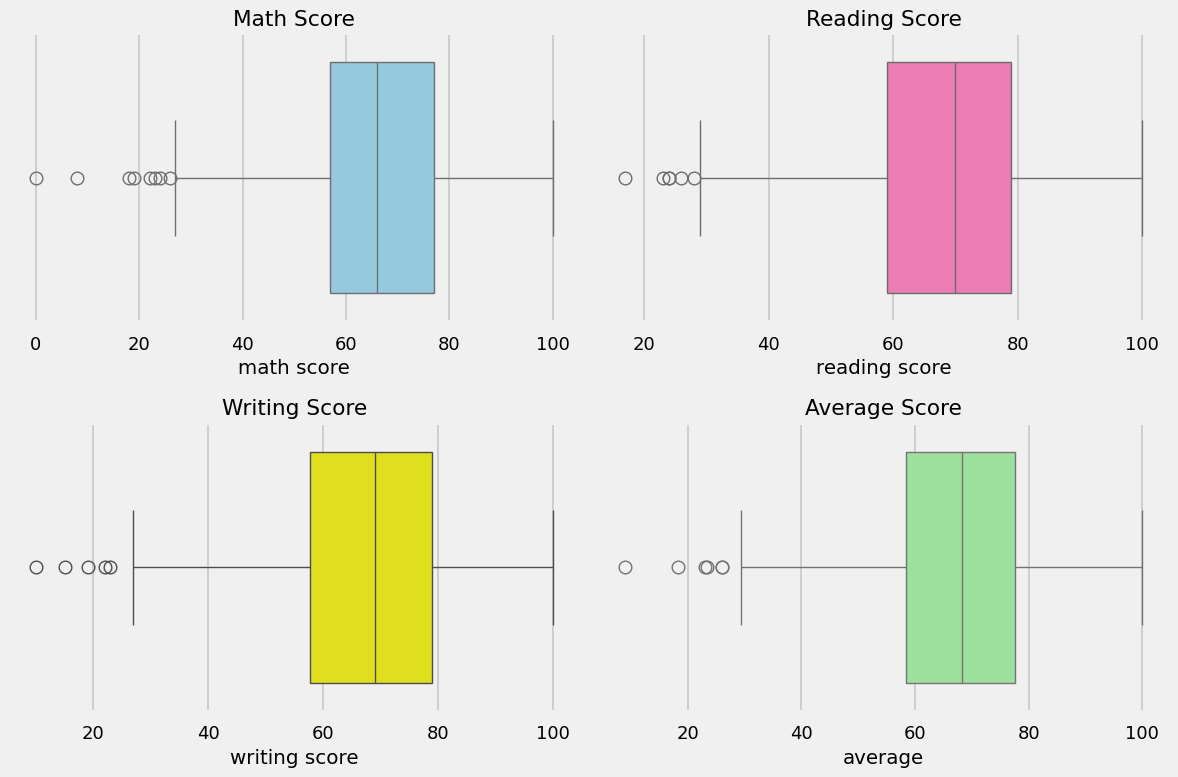

In [37]:
# Create a 2x2 grid of subplots with figure size
plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Boxplot for Math Score
plt.subplot(221)
sns.boxplot(x='math score', data=df, color='skyblue')
plt.title('Math Score')

# Plot 2: Boxplot for Reading Score
plt.subplot(222)
sns.boxplot(x='reading score', data=df, color='hotpink')
plt.title('Reading Score')

# Plot 3: Boxplot for Writing Score
plt.subplot(223)
sns.boxplot(x='writing score', data=df, color='yellow')
plt.title('Writing Score')

# Plot 4: Boxplot for Average Score
plt.subplot(224)
sns.boxplot(x='average', data=df, color='lightgreen')
plt.title('Average Score')

# Adjust layout to ensure spacing
plt.tight_layout()
plt.show()

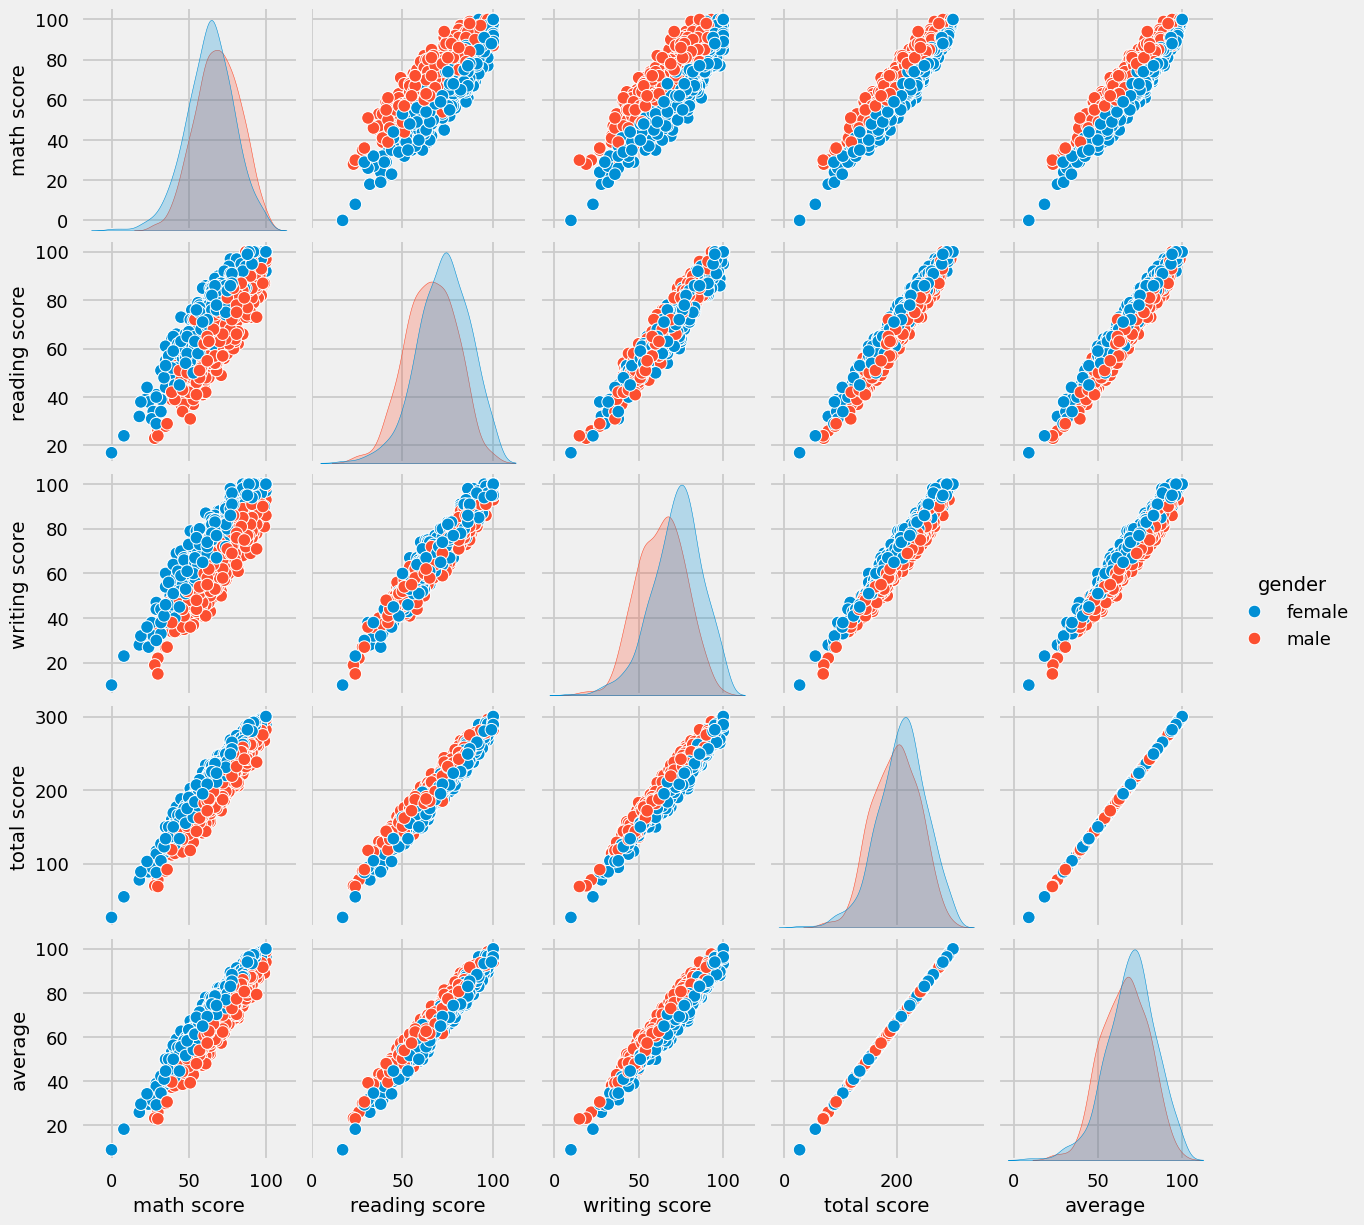

In [39]:
sns.pairplot(df, hue='gender')
plt.show()

### Insights
The pair plot indicates a clear linear relationship between the scores, suggesting that higher performance in one subject is generally associated with higher performance in others.

### Conclusions
- Student performance is influenced by factors such as lunch type, race/ethnicity, and parental level of education.
- Female students have a higher pass percentage and tend to be top scorers.
- Student performance does not show a strong correlation with the test preparation course.
- However, completing the test preparation course is beneficial, leading to improved scores.